<a href="https://colab.research.google.com/github/carlosbona475/primeira-missao-analise-pharma/blob/main/analise_vendas_pharma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

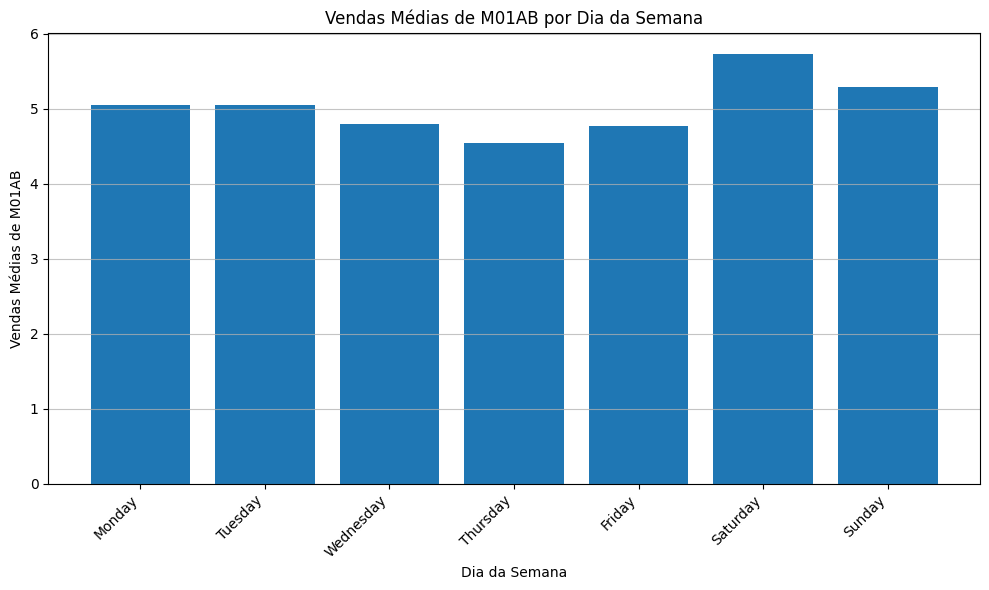

Vendas médias de M01AB por Dia da Semana:


,,M01AB
Weekday,Weekday Name,
0,Monday,5.055736
1,Tuesday,5.047331
2,Wednesday,4.797356
3,Thursday,4.549169
4,Friday,4.770476
5,Saturday,5.727755
6,Sunday,5.287175


In [39]:
# Extrair o dia da semana da coluna 'datum' (0=Monday, 6=Sunday)
df_sales['Weekday'] = df_sales['datum'].dt.weekday
df_sales['Weekday Name'] = df_sales['datum'].dt.day_name()

# Agrupar por dia da semana e calcular a média de vendas de M01AB por dia da semana
# Ordenar por dia da semana para uma visualização lógica
weekly_sales_M01AB = df_sales.groupby(['Weekday', 'Weekday Name'])['M01AB'].mean().sort_index()

# Plotar as vendas médias por dia da semana
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Usar os nomes dos dias da semana para os rótulos do eixo x
plt.bar(weekly_sales_M01AB.index.get_level_values(1), weekly_sales_M01AB.values)
plt.title('Vendas Médias de M01AB por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Vendas Médias de M01AB')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

print("Vendas médias de M01AB por Dia da Semana:")
display(weekly_sales_M01AB)

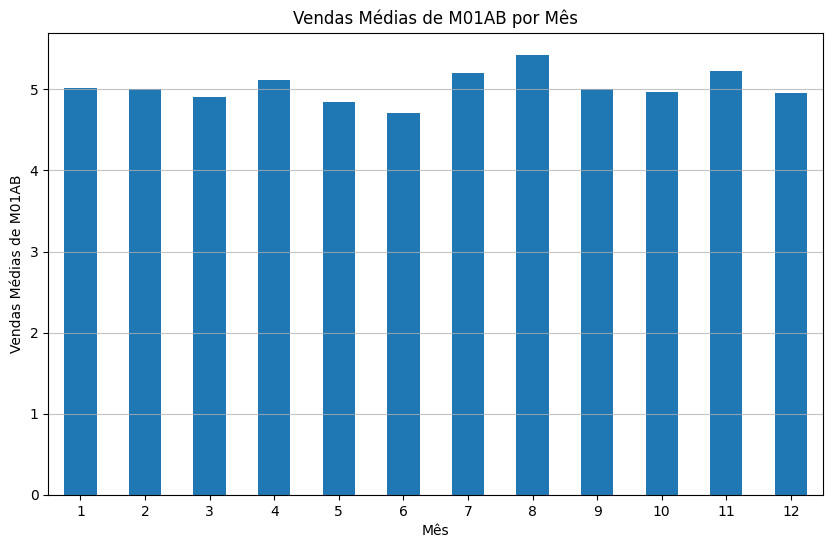

Vendas médias de M01AB por Mês:


,M01AB
Month,
1,5.022336
2,4.999527
3,4.912097
4,5.117944
5,4.846183
6,4.714778
7,5.207921
8,5.428333
9,5.004889


In [40]:
# Extrair o mês da coluna 'datum'
df_sales['Month'] = df_sales['datum'].dt.month

# Agrupar por mês e calcular a média de vendas de M01AB por mês
monthly_sales_M01AB = df_sales.groupby('Month')['M01AB'].mean()

# Plotar as vendas médias por mês
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_sales_M01AB.plot(kind='bar')
plt.title('Vendas Médias de M01AB por Mês')
plt.xlabel('Mês')
plt.ylabel('Vendas Médias de M01AB')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

print("Vendas médias de M01AB por Mês:")
display(monthly_sales_M01AB)

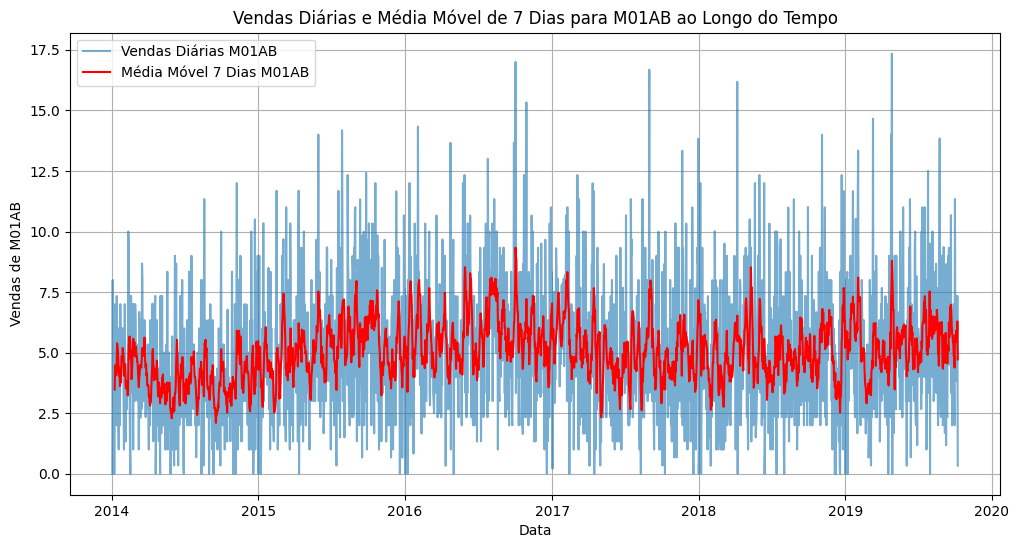

Primeiras linhas do DataFrame com a nova coluna de média móvel:


,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name,M01AB_rolling_mean_7d,Weekday
0,2014-01-02,0.00,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday,NaN,3
1,2014-01-03,8.00,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday,NaN,4
2,2014-01-04,2.00,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday,NaN,5
3,2014-01-05,4.00,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday,NaN,6
4,2014-01-06,5.00,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday,NaN,0
5,2014-01-07,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,2014,1,276,Tuesday,NaN,1
6,2014-01-08,5.33,3.00,10.5,26.40,19.0,1.0,10.0,0.0,2014,1,276,Wednesday,3.475714,2
7,2014-01-09,7.00,1.68,8.0,25.00,16.0,0.0,3.0,2.0,2014,1,276,Thursday,4.475714,3
8,2014-01-10,5.00,2.00,2.0,53.30,15.0,2.0,0.0,2.0,2014,1,276,Friday,4.047143,4
9,2014-01-11,5.00,4.34,10.4,52.30,14.0,0.0,1.0,0.2,2014,1,276,Saturday,4.475714,5


In [41]:
# Calcular a média móvel de 7 dias para a coluna 'M01AB'
df_sales['M01AB_rolling_mean_7d'] = df_sales['M01AB'].rolling(window=7).mean()

# Plotar as vendas originais e a média móvel
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_sales['datum'], df_sales['M01AB'], label='Vendas Diárias M01AB', alpha=0.6)
plt.plot(df_sales['datum'], df_sales['M01AB_rolling_mean_7d'], label='Média Móvel 7 Dias M01AB', color='red')
plt.title('Vendas Diárias e Média Móvel de 7 Dias para M01AB ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas de M01AB')
plt.legend()
plt.grid(True)
plt.show()

print("Primeiras linhas do DataFrame com a nova coluna de média móvel:")
display(df_sales.head(10))

Estatísticas descritivas para a coluna 'Hour':


,Hour
count,2106.000000
mean,275.945869
std,1.970547
min,190.000000
25%,276.000000
50%,276.000000
75%,276.000000
max,276.000000


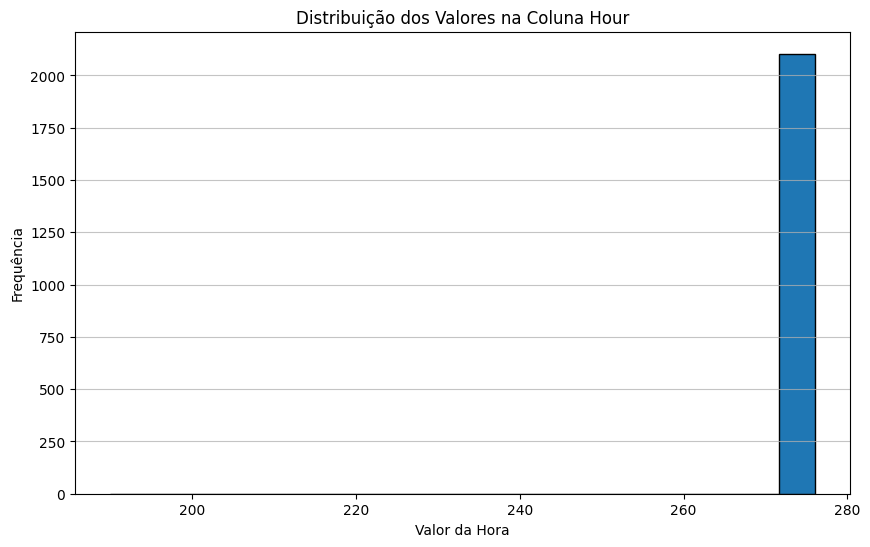

In [42]:
# Exibir estatísticas descritivas para a coluna 'Hour'
print("Estatísticas descritivas para a coluna 'Hour':")
display(df_sales['Hour'].describe())

# Visualizar a distribuição da coluna 'Hour' com um histograma
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_sales['Hour'], bins=20, edgecolor='black')
plt.title('Distribuição dos Valores na Coluna Hour')
plt.xlabel('Valor da Hora')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [43]:
# Ver informações sobre as colunas, como tipo de dado e se há valores nulos.
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   datum                  2106 non-null   datetime64[ns]
 1   M01AB                  2106 non-null   float64       
 2   M01AE                  2106 non-null   float64       
 3   N02BA                  2106 non-null   float64       
 4   N02BE                  2106 non-null   float64       
 5   N05B                   2106 non-null   float64       
 6   N05C                   2106 non-null   float64       
 7   R03                    2106 non-null   float64       
 8   R06                    2106 non-null   float64       
 9   Year                   2106 non-null   int64         
 10  Month                  2106 non-null   int32         
 11  Hour                   2106 non-null   int64         
 12  Weekday Name           2106 non-null   object        
 13  M01

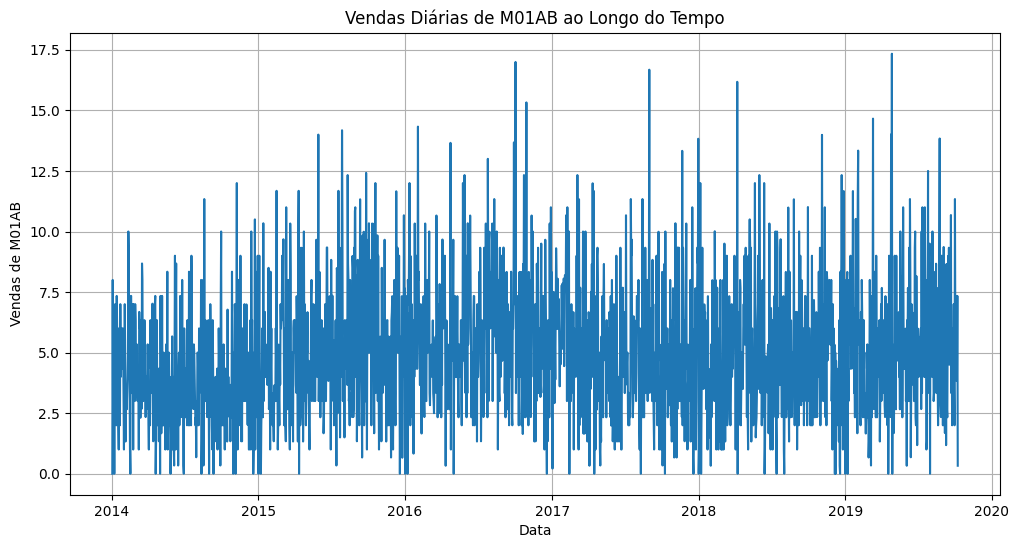

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_sales['datum'], df_sales['M01AB'])
plt.title('Vendas Diárias de M01AB ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas de M01AB')
plt.grid(True)
plt.show()

Estatísticas descritivas para a coluna 'M01AB':


,M01AB
count,2106.000000
mean,5.033683
std,2.737579
min,0.000000
25%,3.000000
50%,4.990000
75%,6.670000
max,17.340000


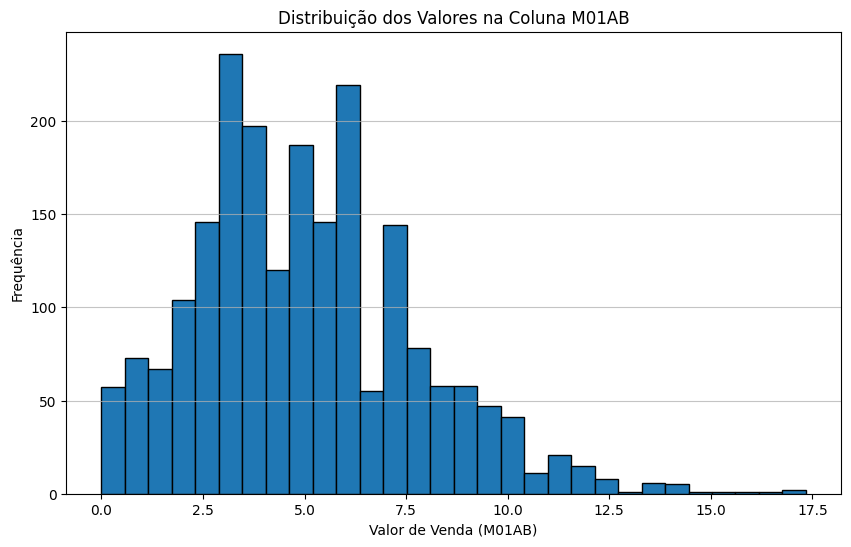

In [45]:
# Exibir estatísticas descritivas para a coluna 'M01AB'
print("Estatísticas descritivas para a coluna 'M01AB':")
display(df_sales['M01AB'].describe())

# Visualizar a distribuição da coluna 'M01AB' com um histograma
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_sales['M01AB'], bins=30, edgecolor='black') # Ajuste o número de bins conforme necessário
plt.title('Distribuição dos Valores na Coluna M01AB')
plt.xlabel('Valor de Venda (M01AB)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [46]:
# Converte a coluna 'datum' de texto para o formato de data.
df_sales['datum'] = pd.to_datetime(df_sales['datum'], format='%m/%d/%Y')

# Verifica novamente as informações para confirmar a mudança.
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   datum                  2106 non-null   datetime64[ns]
 1   M01AB                  2106 non-null   float64       
 2   M01AE                  2106 non-null   float64       
 3   N02BA                  2106 non-null   float64       
 4   N02BE                  2106 non-null   float64       
 5   N05B                   2106 non-null   float64       
 6   N05C                   2106 non-null   float64       
 7   R03                    2106 non-null   float64       
 8   R06                    2106 non-null   float64       
 9   Year                   2106 non-null   int64         
 10  Month                  2106 non-null   int32         
 11  Hour                   2106 non-null   int64         
 12  Weekday Name           2106 non-null   object        
 13  M01

In [47]:
# Filtrar o DataFrame para linhas onde 'Hour' é 190 ou 248
specific_hour_rows = df_sales[df_sales['Hour'].isin([190, 248])]

print("Linhas onde 'Hour' é 190 ou 248:")
display(specific_hour_rows)

Linhas onde 'Hour' é 190 ou 248:


,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name,M01AB_rolling_mean_7d,Weekday
0,2014-01-02,0.00,3.67,3.4,32.4,7.0,0.0,0.0,2.0,2014,1,248,Thursday,NaN,3
2105,2019-10-08,0.33,1.73,0.5,44.3,20.0,2.0,2.0,0.0,2019,10,190,Tuesday,4.718571,1


In [48]:
# Agrupar por 'Hour' e 'Year' e contar as ocorrências
hour_year_counts = df_sales.groupby(['Hour', 'Year']).size().unstack(fill_value=0)

print("Contagem de valores 'Hour' por Ano:")
display(hour_year_counts)

Contagem de valores 'Hour' por Ano:


Year,2014,2015,2016,2017,2018,2019
Hour,,,,,,
190,0,0,0,0,0,1
248,1,0,0,0,0,0
276,363,365,366,365,365,280


In [49]:
# Agrupar por 'Hour' e 'Weekday Name' e contar as ocorrências
hour_weekday_counts = df_sales.groupby(['Hour', 'Weekday Name']).size().unstack(fill_value=0)

print("Contagem de valores 'Hour' por Dia da Semana:")
display(hour_weekday_counts)

Contagem de valores 'Hour' por Dia da Semana:


Weekday Name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour,,,,,,,
190,0,0,0,0,0,1,0
248,0,0,0,0,1,0,0
276,301,301,301,301,300,300,300


In [50]:
# Vamos calcular o total de vendas para o medicamento M01AB.
# A função .sum() simplesmente soma todos os valores de uma coluna.
total_vendas_M01AB = df_sales['M01AB'].sum()

# O comando "print" exibe o resultado na tela.
print("Total de vendas para o medicamento M01AB:")
print(total_vendas_M01AB)

Total de vendas para o medicamento M01AB:
10600.937083334


In [51]:
import pandas as pd
import os

# O caminho para onde o kagglehub baixou os arquivos
download_path = '/root/.cache/kagglehub/datasets/milanzdravkovic/pharma-sales-data/versions/1'

# Liste os arquivos no diretório baixado para encontrar o nome do arquivo CSV
print("Arquivos no diretório baixado:")
display(os.listdir(download_path))

# Assumindo que o arquivo CSV principal tem um nome específico, por exemplo 'sales.csv'
# Você pode precisar ajustar o nome do arquivo abaixo se for diferente
file_name = 'salesdaily.csv' # Substitua pelo nome real do arquivo CSV, se for diferente
file_path = os.path.join(download_path, file_name)

# Verifique se o arquivo CSV existe e carregue-o
if os.path.exists(file_path):
    df_sales = pd.read_csv(file_path)
    print(f"\nArquivo '{file_name}' carregado com sucesso.")
    display(df_sales.head())
else:
    print(f"\nErro: O arquivo '{file_name}' não foi encontrado em '{download_path}'.")
    print("Por favor, verifique o nome do arquivo na lista acima e atualize a variável 'file_name'.")

Arquivos no diretório baixado:


['salesweekly.csv', 'salesdaily.csv', 'saleshourly.csv', 'salesmonthly.csv']


Arquivo 'salesdaily.csv' carregado com sucesso.


,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [52]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("milanzdravkovic/pharma-sales-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pharma-sales-data' dataset.
Path to dataset files: /kaggle/input/pharma-sales-data
